In [15]:
from animalai.envs.gym.environment import AnimalAIGym
import random
from animalai.envs.arena_config import ArenaConfig

import os
import yaml
import copy
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# CONFIG
env_path = '../env/AnimalAI'
worker_id = random.randint(1, 100)
competition_envs = os.listdir('../competition_configurations/')
tool_use = [i for i in competition_envs if i[:2]=='10']
spatial_elim = [i for i in competition_envs if i[0]=='5']
arena_path = "../competition_configurations/10-14-1.yml" #'configurations/curriculum/0.yaml'
arena_config = ArenaConfig(arena_path)
seed = 1

def get_clock_positions():
    """x,y,z,rot. y is elevation. Start from bottom left and go counter clockwise. rotation is aligned with z axis."""
    return [
        [1, 0, 1, 45],
        [20, 0, 1, 0],
        [39, 0, 1, 315], # can't do -45 for some reason
        [39, 0, 20, 270],
        [39, 0, 39, 225],
        [20, 0, 39, 180],
        [1, 0, 39, 135],
        [1, 0, 20, 90],
    ]
def rotate_agent(ac):
    """ac: ArenaConfig
        arena0 = original agent position
        arena1-8 full clock rotation of agent"""
    # Get agent clock positions
    clock_positions = get_clock_positions()

    for i in range(1,9):
        ac.arenas[i] = copy.deepcopy(ac.arenas[0])
    # Get agent object index
    item_list = [i.to_proto().name for i in arena_config.arenas[0].items]
    if 'Agent' in item_list:
        agent_idx = item_list.index('Agent')
    else:
        return None
    # Instantiate each ac with the right agent pos/rotation
    for arena in range(1,9):
        ac.arenas[arena].items[agent_idx].positions[0].x = clock_positions[arena-1][0]
        ac.arenas[arena].items[agent_idx].positions[0].y = clock_positions[arena-1][1]
        ac.arenas[arena].items[agent_idx].positions[0].z = clock_positions[arena-1][2]

        if ac.arenas[arena].items[agent_idx].rotations:
            ac.arenas[arena].items[agent_idx].rotations[0] = clock_positions[arena-1][3]
        else:
            ac.arenas[arena].items[agent_idx].rotations = [clock_positions[arena-1][3]]

    return ac
def compile_arena_configs(arena_paths, task_type='tool_use'):
    res = []
    for arena_path in arena_paths:
        yaml_path = f'../competition_configurations/{arena_path}'
        ac = ArenaConfig(yaml_path)
        arena = ac.to_proto().arenas[0]
        for c1, item in enumerate(arena.items):
            name = item.name
            for c2, sub_item in enumerate(item.positions):
                sub_res = [task_type, arena_path,
                          f'{c1}.{c2}',
                           name,
                            sub_item.x, sub_item.y, sub_item.z]
                if item.colors:
                    sub_res += [
                        item.colors[c2].x,
                        item.colors[c2].y,
                        item.colors[c2].z]
                else:
                    sub_res += [np.nan, np.nan, np.nan]
                if item.rotations:
                    sub_res += [item.rotations[c2]]
                else:
                    sub_res += [np.nan]
                if item.sizes:
                    sub_res += [item.sizes[c2].x, item.sizes[c2].y, item.sizes[c2].z]
                else:
                    sub_res += [np.nan]

                res.append(sub_res)
    cols = [
        'task', 'arena_id', 'item_id', 'item_type',
        'pos_x', 'pos_y', 'pos_z',
        'r', 'g', 'b',
        'rotation',
        'size_x', 'size_y', 'size_z']
    df = pd.DataFrame(res, columns=cols)
    return df

df = compile_arena_configs(tool_use, 'tool_use')
df = df.append(compile_arena_configs(spatial_elim, 'spatial_elim'))
all_ids = sorted(df.arena_id.unique())

2020-04-27 19:55:54 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 19:55:55 INFO [environment.py:305] Connected new brain:
AnimalAI?team=0
2020-04-27 19:55:55 INFO [__init__.py:357] 9 agents within environment.
2020-04-27 19:55:56 INFO [environment.py:455] Environment shut down with return code 0.


==== Batch 0/35 done ==== 


2020-04-27 19:56:09 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 19:56:09 INFO [environment.py:305] Connected new brain:
AnimalAI?team=0
2020-04-27 19:56:09 INFO [__init__.py:357] 9 agents within environment.
2020-04-27 19:56:11 INFO [environment.py:455] Environment shut down with return code 0.
2020-04-27 19:56:14 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 19:56:14 INFO [environment.py:305] Connected new brain:
AnimalAI?team=0
2020-04-27 19:56:15 INFO [__init__.py:357] 9 agents within environment.
2020-04-27 19:56:17 INFO [environment.py:455] Environment shut down with return code 0.
2020-04-27 19:56:20 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 19:56:20 INFO [environment.py:305] Connected new brain:
AnimalAI?

==== Batch 5/35 done ==== 


2020-04-27 19:56:40 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 19:56:40 INFO [environment.py:305] Connected new brain:
AnimalAI?team=0
2020-04-27 19:56:40 INFO [__init__.py:357] 9 agents within environment.
2020-04-27 19:56:45 INFO [environment.py:455] Environment shut down with return code 0.
2020-04-27 19:56:48 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 19:56:48 INFO [environment.py:305] Connected new brain:
AnimalAI?team=0
2020-04-27 19:56:48 INFO [__init__.py:357] 9 agents within environment.
2020-04-27 19:56:53 INFO [environment.py:455] Environment shut down with return code 0.
2020-04-27 19:56:56 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 19:56:56 INFO [environment.py:305] Connected new brain:
AnimalAI?

==== Batch 10/35 done ==== 


2020-04-27 19:57:24 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 19:57:24 INFO [environment.py:305] Connected new brain:
AnimalAI?team=0
2020-04-27 19:57:24 INFO [__init__.py:357] 9 agents within environment.
2020-04-27 19:57:32 INFO [environment.py:455] Environment shut down with return code 0.
2020-04-27 19:57:34 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 19:57:35 INFO [environment.py:305] Connected new brain:
AnimalAI?team=0
2020-04-27 19:57:35 INFO [__init__.py:357] 9 agents within environment.
2020-04-27 19:57:42 INFO [environment.py:455] Environment shut down with return code 0.
2020-04-27 19:57:45 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 19:57:45 INFO [environment.py:305] Connected new brain:
AnimalAI?

==== Batch 15/35 done ==== 


2020-04-27 19:58:21 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 19:58:21 INFO [environment.py:305] Connected new brain:
AnimalAI?team=0
2020-04-27 19:58:21 INFO [__init__.py:357] 9 agents within environment.
2020-04-27 19:58:31 INFO [environment.py:455] Environment shut down with return code 0.
2020-04-27 19:58:34 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 19:58:34 INFO [environment.py:305] Connected new brain:
AnimalAI?team=0
2020-04-27 19:58:34 INFO [__init__.py:357] 9 agents within environment.
2020-04-27 19:58:45 INFO [environment.py:455] Environment shut down with return code 0.
2020-04-27 19:58:48 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 19:58:48 INFO [environment.py:305] Connected new brain:
AnimalAI?

==== Batch 20/35 done ==== 


2020-04-27 19:59:31 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 19:59:31 INFO [environment.py:305] Connected new brain:
AnimalAI?team=0
2020-04-27 19:59:31 INFO [__init__.py:357] 9 agents within environment.
2020-04-27 19:59:44 INFO [environment.py:455] Environment shut down with return code 0.
2020-04-27 19:59:47 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 19:59:47 INFO [environment.py:305] Connected new brain:
AnimalAI?team=0
2020-04-27 19:59:47 INFO [__init__.py:357] 9 agents within environment.
2020-04-27 20:00:00 INFO [environment.py:455] Environment shut down with return code 0.
2020-04-27 20:00:03 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 20:00:03 INFO [environment.py:305] Connected new brain:
AnimalAI?

==== Batch 25/35 done ==== 


2020-04-27 20:00:55 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 20:00:55 INFO [environment.py:305] Connected new brain:
AnimalAI?team=0
2020-04-27 20:00:56 INFO [__init__.py:357] 9 agents within environment.
2020-04-27 20:01:11 INFO [environment.py:455] Environment shut down with return code 0.
2020-04-27 20:01:14 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 20:01:14 INFO [environment.py:305] Connected new brain:
AnimalAI?team=0
2020-04-27 20:01:14 INFO [__init__.py:357] 9 agents within environment.
2020-04-27 20:01:30 INFO [environment.py:455] Environment shut down with return code 0.
2020-04-27 20:01:32 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 20:01:33 INFO [environment.py:305] Connected new brain:
AnimalAI?

==== Batch 30/35 done ==== 


2020-04-27 20:02:32 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 20:02:33 INFO [environment.py:305] Connected new brain:
AnimalAI?team=0
2020-04-27 20:02:33 INFO [__init__.py:357] 9 agents within environment.
2020-04-27 20:02:51 INFO [environment.py:455] Environment shut down with return code 0.
2020-04-27 20:02:53 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 20:02:54 INFO [environment.py:305] Connected new brain:
AnimalAI?team=0
2020-04-27 20:02:54 INFO [__init__.py:357] 9 agents within environment.
2020-04-27 20:03:12 INFO [environment.py:455] Environment shut down with return code 0.
2020-04-27 20:03:15 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-04-27 20:03:15 INFO [environment.py:305] Connected new brain:
AnimalAI?

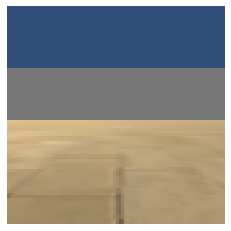

In [2]:
from matplotlib import pyplot as plt
import time
batch = all_ids[145:]
for c, i in enumerate(batch):
    arena_path = f"../competition_configurations/{i}" #'configurations/curriculum/0.yaml'
    arena_config = ArenaConfig(arena_path)
    ac = rotate_agent(arena_config)
    if ac is None:
        print(f'arena {arena_path} has no agent, skipping')
        continue
    env = AnimalAIGym(environment_filename=env_path,
                  worker_id=worker_id,
                  n_arenas=9,
                  arenas_configurations=ac,

                    seed=seed,
                     grayscale=False)
    x = env.step([[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0], [0,0]])

    for arena_idx in range(0,9):
        plt.axis('off')
        plt.imshow(env.visual_obs[0][arena_idx])
        plt.savefig(f'aai_frames/{i}_agent{arena_idx}.png',bbox_inches='tight',transparent=True, pad_inches=0)
    env.close()
    if c % 5 ==0:
        print(f'==== Batch {c}/{len(batch)} done ==== ')
    if c%35 ==0:
        time.sleep(10)

In [3]:
len(os.listdir('aai_frames'))


1540

In [ ]:
# import cv2
plt.imread('bam.jpg')/255

In [5]:
df['item_type'].unique()

array(['GoodGoal', 'DeathZone', 'Cardbox2', 'Agent', 'Wall', 'Ramp',
       'Cardbox1', 'UObject', 'LObject2', 'LObject', 'WallTransparent',
       'GoodGoalMulti', 'CylinderTunnel', 'CylinderTunnelTransparent'],
      dtype=object)

In [ ]:
import cv2
import numpy as np

# Config
class BGR:
    black = (0,0,0)
    grey =  \
    (128, 128, 128)


class HSV:
    """Color lower and upper bounds in HSV format"""

    @classmethod
    def __getattribute__(cls,attr):
        return [np.array(i) for i in getattr(cls, attr)]

    green = [[33,80,40], [102,255,255]]
    # red = [[0,181,0], [6,255,255]]
    # red = [[0,184,0], [179,208,217]]
    red = [[125,16,88], [179,255,255]]

    brown = [[7,53,40], [18,87,121]]

hsv_cls = HSV()
objects = {
    'goal': hsv_cls.green,
    # 'danger_zone': hsv_cls.red,
    # 'tool': hsv_cls.brown
}

class FeatureExtractor:
    
    def __init__(self):
        self.img = None
        self.hsv_img = None

    def get_contour(self, hsv):
        # Config
        kernel_open=np.ones((5,5))
        kernel_close=np.ones((20,20))

        # Apply mask to get contour
        mask = cv2.inRange(self.hsv_img, hsv[0], hsv[1])
        mask_open = cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel_open)
        mask_close = cv2.morphologyEx(mask_open,cv2.MORPH_CLOSE,kernel_close)
        ctr,hier = cv2.findContours(mask_close.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
        print(len(hier))
        if not ctr:
            return None, hier
        return ctr, hier

    def draw_contour(self, ctr, obj):
        if obj in ['goal']: # TODO get rid of this hackiness
            # cv2.drawContours(self.img,ctr,0,BGR.black,2)
            return ctr
        else:
            hull = np.zeros((0, 1, 2), np.int32)
            for i in range(len(ctr)):
                hull = np.concatenate((hull, ctr[i]), axis=0)
            hull = cv2.convexHull(hull, False)
            # cv2.drawContours(self.img,[hull],-1,BGR.black,2)
            return [hull]

    def process_contour(self, ctr):
        # Fixed horizontal rectangle
        x,y,w,h = cv2.boundingRect(ctr[0])
        cv2.rectangle(self.img,(x,y),(x+w,y+h),(0,255,0),2)
        # Rotated rectangle
        # rect = cv2.minAreaRect(ctr[0])
        # box = cv2.boxPoints(rect)
        # box = np.int0(box)
        # cv2.drawContours(self.img,[box],0,(0,0,255),2)
        # res = {'x':x, 'y':y, 'w':w, 'h':h}
        # return nt('coords', list(res.keys()))(**res)
        res = [x,y,w,h]
        return res

    def run(self, img):
        # Preprocessing numpy array to be in cv BGR and scaled format
        img = cv2.cvtColor((img*255).astype('uint8'), cv2.COLOR_RGB2BGR)
        setattr(self, 'img', img)
        setattr(self, 'hsv_img', cv2.cvtColor(self.img, cv2.COLOR_BGR2HSV))


        features = {}
        for obj, hsv_clr in objects.items():
            ctr, hier = self.get_contour(hsv_clr)
            if ctr is None:
                features[obj] = [0,0,0,0]
                continue
            ctr = self.draw_contour(ctr, obj)
            coords = self.process_contour(ctr)
            features[obj] = coords


        return features


In [ ]:
from matplotlib import pyplot as plt
# a1 = np.random.choice([0,1,2])
# a2 = np.random.choice([0,1,2])
x = env.step({'Learner':(0,0
                        )})
# img1 = x[0][0].astype('float32')

# img2 = cv2.imread('test5.jpg')
fe = FeatureExtractor()
res = fe.run(x[0][0])
fig = plt.imshow(fe.img)
# fig = plt.imshow((x[0][0]*255).astype('uint8'))
plt.show()
res

In [ ]:
# img2 = cv2.imread('test3.jpg')
# img1 = cv2.resize(img1, (84,84))
# img2 = cv2.imread('ba.jpg')
ef = ExtractFeatures()
res = ef.run((x*255).astype('uint8'))
res

In [ ]:
import sys
import random
import os
from animalai.envs.arena_config import ArenaConfig
from animalai.envs.environment import AnimalAIEnvironment


# if __name__ == "__main__":
#     if len(sys.argv) > 1:
#         configuration_file = sys.argv[1]
#     else:
competition_folder = "../competition_configurations/"
configuration_files = os.listdir(competition_folder)
configuration_random = random.randint(0, len(configuration_files))
configuration_file = (
    competition_folder + configuration_files[configuration_random]
)
env_path = "../env/AnimalAI"
port = 5005 + random.randint(
    0, 100
)  # use a random port to allow relaunching the script rapidly
configuration = ArenaConfig(configuration_file)
# load_config_and_play(configuration_file=configuration_file)
environment = AnimalAIEnvironment(
    file_name=env_path,
    base_port=port,
    arenas_configurations=configuration,
    play=True,
)

In [ ]:
import os
import yaml
competition_envs = os.listdir('../competition_configurations/')
tool_use = [i for i in competition_envs if i[:2]=='10']
spatial_elim = [i for i in competition_envs if i[0]=='5']
len(spatial_elim)

In [ ]:
import numpy as np
def compile_arena_configs(arena_paths, task_type='tool_use'):
    res = []
    for arena_path in arena_paths:
        yaml_path = f'../competition_configurations/{arena_path}'
        ac = ArenaConfig(yaml_path)
        arena = ac.to_proto().arenas[0]
        for c1, item in enumerate(arena.items):
            name = item.name
            for c2, sub_item in enumerate(item.positions):
                sub_res = [task_type, arena_path,
                          f'{c1}.{c2}',
                           name,
                            sub_item.x, sub_item.y, sub_item.z]
                if item.colors:
                    sub_res += [
                        item.colors[c2].x,
                        item.colors[c2].y,
                        item.colors[c2].z]
                else:
                    sub_res += [np.nan, np.nan, np.nan]
                if item.rotations:
                    sub_res += [item.rotations[c2]]
                else:
                    sub_res += [np.nan]
                if item.sizes:
                    sub_res += [item.sizes[c2].x, item.sizes[c2].y, item.sizes[c2].z]
                else:
                    sub_res += [np.nan]

                res.append(sub_res)
    cols = [
        'task', 'arena_id', 'item_id', 'item_type',
        'pos_x', 'pos_y', 'pos_z',
        'r', 'g', 'b',
        'rotation',
        'size_x', 'size_y', 'size_z']
    df = pd.DataFrame(res, columns=cols)
    return df


In [ ]:
import pandas as pd

df = compile_arena_configs(tool_use, 'tool_use')
# df = df.append(compile_arena_configs(spatial_elim, 'spatial_elim'))
# arena ../competition_configurations/5-13-1.yml has no agent, skipping
# arena ../competition_configurations/5-13-2.yml has no agent, skipping
# arena ../competition_configurations/5-13-3.yml has no agent, skipping
# arena ../competition_configurations/5-14-1.yml has no agent, skipping
# arena ../competition_configurations/5-14-2.yml has no agent, skipping
# arena ../competition_configurations/5-14-3.yml has no agent, skipping
# arena ../competition_configurations/5-15-1.yml has no agent, skipping
# arena ../competition_configurations/5-15-2.yml has no agent, skipping
# arena ../competition_configurations/5-15-3.yml has no agent, skipping

In [ ]:
df[df['item_type']=='Agent'][['pos_x', 'pos_y', 'pos_z']]

In [ ]:
from animalai.envs.gym.environment import AnimalAIGym
import random
from animalai.envs.arena_config import ArenaConfig


env_path = '../env/AnimalAI'
worker_id = random.randint(1, 100)
arena_path = "../competition_configurations/10-1-1.yml" #'configurations/curriculum/0.yaml'
arena_config = ArenaConfig(arena_path)
run_id = f'neuro_{worker_id}'
model_path = f'./models/{run_id}'
save_freq = 5000
seed = 1
trainer_config = {
            'episode_length': 1000,
            'batch_size': 128,
            't_network_update_rate': 50,
            'dqn': {
                'gamma':0.9,
                'learning_rate': 0.001
            },
            'delta': 3e-5,
            'slow_delta': 2e-5, # For when epsilon is under 0.1
            'buffer': {
                'alpha': 0.7,
                'eps': 10e-4
            }
        }

In [12]:
import random
x = ["GoodGoal", 'DeathZone', 'Cardbox2', 'Agent', 'Wall', 'Ramp',
       'Cardbox1', 'UObject', 'LObject2', 'LObject', 'WallTransparent',
       'GoodGoalMulti', 'CylinderTunnel', 'CylinderTunnelTransparent']
# {k:0 for k in x}
set(f"{i}" for i in x)
print("""{'Agent',
 'Cardbox1',
 'Cardbox2',
 'CylinderTunnel',
 'CylinderTunnelTransparent',
 'DeathZone',
 'GoodGoal',
 'GoodGoalMulti',
 'LObject',
 'LObject2',
 'Ramp',
 'UObject',
 'Wall',
 'WallTransparent'}""".replace("'", '"'))

{"Agent",
 "Cardbox1",
 "Cardbox2",
 "CylinderTunnel",
 "CylinderTunnelTransparent",
 "DeathZone",
 "GoodGoal",
 "GoodGoalMulti",
 "LObject",
 "LObject2",
 "Ramp",
 "UObject",
 "Wall",
 "WallTransparent"}


In [36]:
for i in x:
    print(i)
    display(df[df['item_type']==i][['size_x', 'size_y', 'size_z']].describe().loc[['min', 'max']])

GoodGoal


,size_x,size_y,size_z
min,0.5,0.5,0.5
max,1.0,2.0,1.0


DeathZone


,size_x,size_y,size_z
min,2.000000,0.0,0.990000
max,39.900002,0.0,39.990002


Cardbox2


,size_x,size_y,size_z
min,1.5,0.5,0.8
max,10.0,3.0,5.0


Agent


,size_x,size_y,size_z
min,NaN,NaN,NaN
max,NaN,NaN,NaN


Wall


,size_x,size_y,size_z
min,0.1,0.1,0.1
max,40.0,5.0,40.0


Ramp


,size_x,size_y,size_z
min,3.9,0.5,1.0
max,5.0,1.5,10.0


Cardbox1


,size_x,size_y,size_z
min,0.2,0.5,0.2
max,3.0,5.0,4.5


UObject


,size_x,size_y,size_z
min,1.0,0.5,10.0
max,10.0,2.0,10.0


LObject2


,size_x,size_y,size_z
min,5.0,1.0,4.0
max,10.0,1.0,10.0


LObject


,size_x,size_y,size_z
min,5.0,1.0,4.0
max,10.0,1.0,10.0


WallTransparent


,size_x,size_y,size_z
min,1.0,0.1,1.0
max,35.0,5.0,10.0


GoodGoalMulti


,size_x,size_y,size_z
min,1.0,1.0,1.0
max,1.0,1.0,1.0


CylinderTunnel


,size_x,size_y,size_z
min,4.0,4.0,5.0
max,10.0,10.0,10.0


CylinderTunnelTransparent


,size_x,size_y,size_z
min,4.0,4.0,5.0
max,10.0,10.0,10.0


In [ ]:
import random
sample_objects = lambda: random.sample(obj_types, random.randint(2,7))
vector = lambda x,y,z: f'      - !Vector3 {x: {x}, y: {y}, z: {z}}'
def yaml_writer():
    pass
size_mapping = {
    'GoodGoal': [0.5, 4],
     'DeathZone': [1, 39],
     'Cardbox2': [1, 10],
     'Agent': [1, 1],
     'Wall': [0.1, 40],
     'Ramp': [1, 10],
     'Cardbox1': [1, 10],
     'UObject': [1, 10],
     'LObject2': [4, 10],
     'LObject': [4, 10],
     'WallTransparent': [1, 35],
     'GoodGoalMulti': [1, 1],
     'CylinderTunnel': [4, 15],
     'CylinderTunnelTransparent': [4, 15]}
y_size = {'GoodGoal': lambda: random.randint(0.5, 2),
 'DeathZone': 0,
 'Cardbox2': lambda: random.randint(0.5, 3),
 'Agent': 1,
 'Wall': lambda: random.randint(0.1, 5),
 'Ramp': lambda: random.randint(0.5, 3),
 'Cardbox1': lambda: random.randint(0.5, 5),
 'UObject': lambda: random.randint(0.5, 3),
 'LObject2': 1,
 'LObject': 1,
 'WallTransparent': lambda: random.randint(0.1, 5),
 'GoodGoalMulti': 1,
 'CylinderTunnel': lambda: random.randint(4, 10),
 'CylinderTunnelTransparent': lambda: random.randint(4, 10)}
def attribute_generator(obj_type):
    s_min, s_max = size_mapping[obj_type]
#     position = [random.randint(1,35), random.randint(1,35) ,random.randint(1,35)]
    size = [random.randint(s_min,s_max), y_size[obj_type], random.randint(s_min,s_max)]
    rotation = [random.randint(0,360)]
    return position, size, rotation

def config_creator():
    obj_dict = {}
    for obj in sample_objects:
        position, size, rotation = attribute_generator(obj)
        
        obj_dict[obj]['position'] = 
def overlapping(position, size, rotation):
    
def create_item():
    return position, rotation, size
def create_items(objects):
    for name, count in objects.items():
        items['name'] = [create_item(name) for _ in range(0, count)]
items = {
    ''
}
"""
!ArenaConfig
arenas:
  0: !Arena
    pass_mark: -0.1
    t: 500
    items:
    - !Item
      name: WallTransparent
      positions:
      - !Vector3 {x: 13, y: 0, z: 18.5}
      - !Vector3 {x: 13, y: 0, z: 21.5}
      - !Vector3 {x: 27, y: 0, z: 18.5}
      - !Vector3 {x: 27, y: 0, z: 21.5}
      - !Vector3 {x: 20, y: 0, z: 18.5}
      - !Vector3 {x: 20, y: 0, z: 21.5}
      rotations: [0,0,0,0,0,0]
      sizes:
      - !Vector3 {x: 5, y: 2, z: 2}
      - !Vector3 {x: 5, y: 2, z: 2}
      - !Vector3 {x: 5, y: 2, z: 2}
      - !Vector3 {x: 5, y: 2, z: 2}
      - !Vector3 {x: 5, y: 2, z: 2}
      - !Vector3 {x: 5, y: 2, z: 2}
    - !Item
      name: Cardbox2
      positions:
      - !Vector3 {x: 10.5, y: 0, z: 20}
      - !Vector3 {x: 29.5, y: 0, z: 20}
      rotations: [0,0]
      sizes:
      - !Vector3 {x: 10, y: .5, z: 0.8}
      - !Vector3 {x: 10, y: .5, z: 0.8}
    - !Item
      name: DeathZone
      positions:
      - !Vector3 {x: 20, y: 0, z: 20}
      - !Vector3 {x: 16.5, y: 0, z: 20}
      rotations: [0,0]
      sizes:
      - !Vector3 {x: 5, y: 0, z: 1}
      - !Vector3 {x: 2, y: 0, z: 5}
    - !Item
      name: GoodGoal
      positions:
      - !Vector3 {x: 20, y: 0, z: 20}
      sizes:
      - !Vector3 {x: 0.9, y: 0.9, z: 0.9}
    - !Item
      name: Agent
      positions:
      - !Vector3 {x: 5, y: 0, z: 5}"""